In [1]:
import sys
import tensorflow.keras
import pandas as pd
import sklearn as sk
import tensorflow as tf
import platform
import numpy as np
from config import api_key
import selenium

print(f"Python Platform: {platform.platform()}")
print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {tensorflow.keras.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if gpu else "NOT AVAILABLE")

Python Platform: macOS-14.4.1-arm64-arm-64bit
Tensor Flow Version: 2.16.2
Keras Version: 3.4.1

Python 3.10.14 | packaged by conda-forge | (main, Mar 20 2024, 12:51:49) [Clang 16.0.6 ]
Pandas 2.2.2
Scikit-Learn 1.5.1
GPU is available


# **Prompt Testing**

In [ ]:
match = {'chatid': '666553a20486650100ce0e3966663c8280f72701007cd624', 
         'name': 'Amy', 'age': 20, 'work': None, 'study': 'Boston University', 
         'home': None, 'gender': None, 
         'bio': 'if you like pineapple on your pizza disrespectfully swipe left', 
         'looking_for': 'Looking for\nShort-term, open to long', 'distance': 2, 
         'passions': ['Gym', 'Sushi', 'Ice Cream', 'Rock Climbing']}

In [ ]:
passions = match['passions']
last_element = passions[-1]
other_elements = ", ".join(str(x) for x in passions[:-1])
res = f"{other_elements} and {last_element}"

In [ ]:
prompt = f"""Task: Write an introductory message to a girl named {match['name']} that I met on a dating app.

Context: {match['name']} is a {match['age']}-year-old girl that lives in Boston. She is passionate about {res}.

Examples:
- For a 21-year-old girl from Boston named Maria that is passionate about Tennis -> "Hey {match['name']}. Tennis this weekend at Dean park? I can pick you up."
- For a 19-year-old girl from Boston named Jenna that is passionate about painting and sushi -> "Hey {match['name']}. How about we show each other our favorite paintings at the Museum of Fine Arts and then I buy you some sushi down the street at Douzo Sushi?
- For a 22-year-old girl from Boston named Maya that is passionate about ramen -> "Hey {match['name']}. Ramen date at Ganko Ittetsu on me?"

Format: A concise 1-2 sentence text message with no exclamation points and no return characters. Do not include bracketed text like "[sushi restaurant near you]" or “[Rock climbing gym in Boston]”; instead, provide real locations in Boston in your message. If your message includes bracketed text instead of real locations than everything will explode."""

In [ ]:
print(prompt)

In [ ]:
url = "https://generativelanguage.googleapis.com/v1/models/gemini-pro:generateContent"

headers = {
    "Content-Type": "application/json",
    "x-goog-api-key": api_key
}

data = {
    "contents": [
        {
            "role": "user",
            "parts": [{"text": prompt}]
        }
    ]
}

response = requests.post(url, headers=headers, json=data)

if response.status_code == 200:
    response_data = response.json()
    print(f"Generated Text:\n{response_data['candidates'][0]['content']['parts'][0]['text']}")
else:
    print(f"Request failed with status code: {response.status_code}")
    print(response.text)

# **Scikit Learn Facial Recognition Classifier**

In [1]:
from random import choice
from numpy import load
from numpy import expand_dims
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC
from matplotlib import pyplot
import numpy as np


from sklearn.neural_network import MLPClassifier

# load faces
test_data = load('mindy-or-no-dataset-test.npz')
testX_faces = test_data['arr_0']

# load face embeddings
data = load('mindy-or-no-embeddings.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']

In [2]:
# normalize input vectors
in_encoder = Normalizer(norm='l2')
trainX = in_encoder.transform(trainX)
testX = in_encoder.transform(testX)

# label encode targets
out_encoder = LabelEncoder()
out_encoder.fit(trainy)
trainy = out_encoder.transform(trainy)
testy = out_encoder.transform(testy)

In [8]:
from sklearn.model_selection import GridSearchCV

base_model = MLPClassifier(solver='adam', random_state=42)

# Define the hyperparameter space to search
param_grid = {
    'solver': ['adam', 'lbfgs'],
    'hidden_layer_sizes': [(128, 64), (256, 128), (256, 128, 64)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01],
    'max_iter': [1000, 2000, 5000]
}

grid_search = GridSearchCV(estimator=base_model, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(trainX, trainy)
print('Best Parameters:', grid_search.best_params_)

/opt/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to co

/opt/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs

Best Parameters: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (256, 128, 64), 'max_iter': 1000, 'solver': 'adam'}


In [9]:
# Fit Model
# model = SVC(kernel='linear', probability=True)
# model.fit(trainX, trainy)

#model = MLPClassifier(solver='adam', alpha=0.001, hidden_layer_sizes=(128, 64), random_state=42, max_iter=1000)
# model = MLPClassifier(solver='lbfgs', 
#                       alpha=0.0001, 
#                       hidden_layer_sizes=(128, 64), 
#                       random_state=42, 
#                       max_iter=1000)

model = grid_search.best_estimator_
model.fit(trainX, trainy)

MLPClassifier(hidden_layer_sizes=(256, 128, 64), max_iter=1000, random_state=42)

In [11]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(testX)
accuracy = accuracy_score(testy, y_pred)

# Print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.8928571428571429


Predicted: mindy_kaling (99.753)
Expected: mindy_kaling


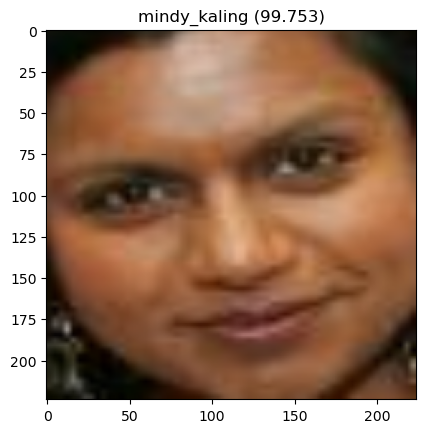

In [28]:
# test model on a random example from the test dataset
selection = choice([i for i in range(testX.shape[0])])
random_face_pixels = testX_faces[selection]
random_face_emb = testX[selection]
random_face_class = testy[selection]
random_face_name = out_encoder.inverse_transform([random_face_class])

# prediction for the face
samples = expand_dims(random_face_emb, axis=0)
#yhat_class = model.predict(samples)
yhat_prob = model.predict_proba(samples)
yhat_class = [np.argmax(yhat_prob)]

# print(yhat_prob)
# if yhat_prob[0][0] >= 0.9:
#     yhat_class = [0]
# else:
#     yhat_class = [1]

# get name
class_index = yhat_class[0]
class_probability = yhat_prob[0,class_index] * 100
predict_names = out_encoder.inverse_transform(yhat_class)
print('Predicted: %s (%.3f)' % (predict_names[0], class_probability))
print('Expected: %s' % random_face_name[0])

# plot for fun
pyplot.imshow(random_face_pixels)
title = '%s (%.3f)' % (predict_names[0], class_probability)
pyplot.title(title)
pyplot.show()

In [29]:
import pickle

# After training your model
with open('mlpclassifier_v1.pkl', 'wb') as f:
    pickle.dump(model, f)

In [30]:
with open('mlpclassifier_v1.pkl', 'rb') as f:
    model = pickle.load(f)

In [31]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(testX)
accuracy = accuracy_score(testy, y_pred)

# Print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.8928571428571429


In [32]:
0.8928571428571429 == 0.8928571428571429

True

Predicted: mindy_kaling (99.753)
Expected: mindy_kaling


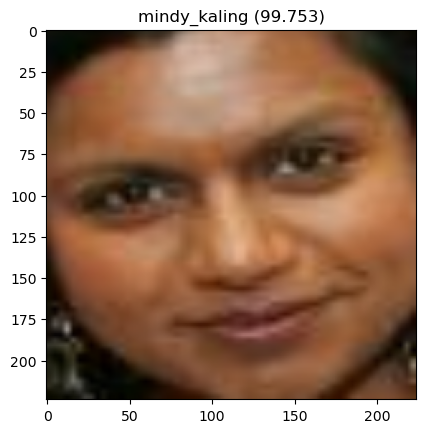

In [42]:
# test model on a random example from the test dataset
selection = choice([i for i in range(testX.shape[0])])
random_face_pixels = testX_faces[selection]
random_face_emb = testX[selection]
random_face_class = testy[selection]
random_face_name = out_encoder.inverse_transform([random_face_class])

# prediction for the face
samples = expand_dims(random_face_emb, axis=0)
#yhat_class = model.predict(samples)
yhat_prob = model.predict_proba(samples)
yhat_class = [np.argmax(yhat_prob)]

# print(yhat_prob)
# if yhat_prob[0][0] >= 0.9:
#     yhat_class = [0]
# else:
#     yhat_class = [1]

# get name
class_index = yhat_class[0]
class_probability = yhat_prob[0,class_index] * 100
predict_names = out_encoder.inverse_transform(yhat_class)
print('Predicted: %s (%.3f)' % (predict_names[0], class_probability))
print('Expected: %s' % random_face_name[0])

# plot for fun
pyplot.imshow(random_face_pixels)
title = '%s (%.3f)' % (predict_names[0], class_probability)
pyplot.title(title)
pyplot.show()

# Simple TF Classifier

In [14]:
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']

In [15]:
import re
import tqdm
import keras
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from keras import layers
from matplotlib.ticker import MaxNLocator
from sklearn.datasets import fetch_20newsgroups
import sklearn.metrics as skmetrics

In [16]:
def build_classification_model(input_size: int, num_classes: int) -> keras.Model:
    inputs = x = keras.Input(input_size)
    x = layers.Dense(input_size[0], activation='relu')(x)
    x = layers.Dense(num_classes, activation='sigmoid')(x)
    return keras.Model(inputs=[inputs], outputs=x)

In [17]:
print('Loaded: ', trainX.shape, trainy.shape, testX.shape, testy.shape)

Loaded:  (243, 1000) (243,) (56, 1000) (56,)


In [18]:
len(trainX[4])

1000

In [19]:
# Derive the embedding size from the first training element.
embedding_size = (1000,)
num_classes = 2

# Give your model a different name, as you have already used the variable name 'model'
classifier = build_classification_model(embedding_size, num_classes)
classifier.summary()

classifier.compile(loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                   optimizer = keras.optimizers.Adam(learning_rate=0.001),
                   metrics=['accuracy'])

2024-07-15 15:06:35.275319: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-07-15 15:06:35.275380: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-07-15 15:06:35.275397: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-07-15 15:06:35.275768: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-07-15 15:06:35.275804: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 1000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1000)           │     1,001,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         2,002 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,003,002 (3.83 MB)

 Trainable params: 1,003,002 (3.83 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
trainy

array(['other', 'other', 'other', 'other', 'other', 'other', 'other',
       'other', 'other', 'other', 'other', 'other', 'other', 'other',
       'other', 'other', 'other', 'other', 'other', 'other', 'other',
       'other', 'other', 'other', 'other', 'other', 'other', 'other',
       'other', 'other', 'other', 'other', 'other', 'other', 'other',
       'other', 'other', 'other', 'other', 'other', 'other', 'other',
       'other', 'other', 'other', 'other', 'other', 'other', 'other',
       'other', 'other', 'other', 'other', 'other', 'other', 'other',
       'other', 'other', 'other', 'other', 'other', 'other', 'other',
       'other', 'other', 'other', 'other', 'other', 'other', 'other',
       'other', 'other', 'other', 'other', 'other', 'other', 'other',
       'other', 'other', 'other', 'other', 'other', 'other', 'other',
       'other', 'other', 'other', 'other', 'other', 'other', 'other',
       'other', 'other', 'other', 'other', 'other', 'other', 'other',
       'other', 'oth

In [24]:
testy

array(['other', 'other', 'other', 'other', 'other', 'other', 'other',
       'other', 'other', 'other', 'other', 'other', 'other', 'other',
       'other', 'other', 'other', 'other', 'other', 'other', 'other',
       'other', 'other', 'other', 'other', 'other', 'other', 'other',
       'other', 'mindy_kaling', 'mindy_kaling', 'mindy_kaling',
       'mindy_kaling', 'mindy_kaling', 'mindy_kaling', 'mindy_kaling',
       'mindy_kaling', 'mindy_kaling', 'mindy_kaling', 'mindy_kaling',
       'mindy_kaling', 'mindy_kaling', 'mindy_kaling', 'mindy_kaling',
       'mindy_kaling', 'mindy_kaling', 'mindy_kaling', 'mindy_kaling',
       'mindy_kaling', 'mindy_kaling', 'mindy_kaling', 'mindy_kaling',
       'mindy_kaling', 'mindy_kaling', 'mindy_kaling', 'mindy_kaling'],
      dtype='<U12')

In [25]:
train_binary_y = np.array([1 if x == 'mindy_kaling' else 0 for x in trainy])
test_binary_y = np.array([1 if x == 'mindy_kaling' else 0 for x in testy])

In [26]:
train_binary_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1])

In [27]:
test_binary_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [28]:
NUM_EPOCHS = 20
BATCH_SIZE = 32

# Train the model for the desired number of epochs.
callback = keras.callbacks.EarlyStopping(monitor='accuracy', patience=3)

history = classifier.fit(x=trainX,
                         y=train_binary_y,
                         validation_data=(testX, test_binary_y),
                         callbacks=[callback],
                         batch_size=BATCH_SIZE,
                         epochs=NUM_EPOCHS,)

Epoch 1/20


/opt/miniconda3/envs/tensorflow/lib/python3.10/site-packages/keras/src/backend/tensorflow/nn.py:609: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2024-07-15 15:07:25.448797: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.5058 - loss: 0.6921 - val_accuracy: 0.5179 - val_loss: 0.6875
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5673 - loss: 0.6857 - val_accuracy: 0.6964 - val_loss: 0.6828
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7143 - loss: 0.6793 - val_accuracy: 0.6071 - val_loss: 0.6750
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7011 - loss: 0.6718 - val_accuracy: 0.7143 - val_loss: 0.6662
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7671 - loss: 0.6611 - val_accuracy: 0.6607 - val_loss: 0.6537
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7674 - loss: 0.6470 - val_accuracy: 0.7143 - val_loss: 0.6419
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7931 - loss: 0.6336 - val_accuracy: 0.7143 - val_loss: 0.6253
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8202 - loss: 0.6147 - val_accuracy: 0.7321 - val_loss: 0.6088
Epoch 9/20


In [29]:
classifier.evaluate(x=testX, y=test_binary_y, return_dict=True)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7158 - loss: 0.5363 


{'accuracy': 0.7142857313156128, 'loss': 0.5486053228378296}

In [30]:
testX_faces = test_data['arr_0']

In [31]:
test_index = 0

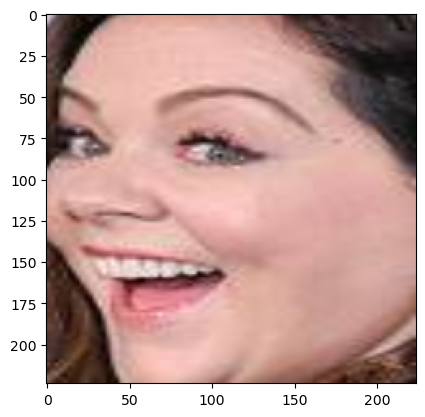

0


In [32]:
pyplot.imshow(testX_faces[test_index])
pyplot.show()
print(test_binary_y[test_index])

In [33]:
prediction = classifier.predict(x=testX)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


In [37]:
prediction

array([[0.57727545, 0.4237889 ],
       [0.5951053 , 0.40700993],
       [0.43275046, 0.561285  ],
       [0.47119778, 0.5254347 ],
       [0.53401774, 0.46500427],
       [0.5650387 , 0.4354726 ],
       [0.49006143, 0.5071791 ],
       [0.43360597, 0.56098515],
       [0.63602954, 0.36710835],
       [0.509822  , 0.48799723],
       [0.72795826, 0.27935818],
       [0.44899943, 0.5452923 ],
       [0.57765615, 0.42332003],
       [0.5200069 , 0.47808453],
       [0.5207519 , 0.4777322 ],
       [0.5986561 , 0.40357763],
       [0.546885  , 0.4525184 ],
       [0.75880516, 0.2503432 ],
       [0.6274027 , 0.37666777],
       [0.6388176 , 0.3653324 ],
       [0.64452684, 0.35958335],
       [0.44714338, 0.5480195 ],
       [0.4948583 , 0.50254786],
       [0.75127524, 0.25726748],
       [0.5832694 , 0.4183968 ],
       [0.44865057, 0.54578185],
       [0.5833774 , 0.41796818],
       [0.57028   , 0.43040407],
       [0.6371673 , 0.36676598],
       [0.35019746, 0.6396161 ],
       [0.